<a href="https://colab.research.google.com/github/aka-gera/Regression/blob/main/salary_data_dataset_for_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **REGRESSION**

*This algorithm will identify the optimal classification machine learning model for a given dataset.*

This dataset is provided by: https://www.kaggle.com/datasets/shubham47/salary-data-dataset-for-linear-regression

## Description
We will conduct a linear regression analysis to investigate how an individual's years of experience influence their salary.


| Column           | Description                                                                                     |
|------------------|-------------------------------------------------------------------------------------------------|
| YearsExperience  | The number of years of experience of an individual in a particular job or field.               |
| Salary           | The salary corresponding to the number of years of experience for the individual.              |


In [ ]:
data_dir = f'shubham47/salary-data-dataset-for-linear-regression'

# Import Dataset

In [ ]:
! pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pwd
%cd /content

/content
/content


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp /content/drive/MyDrive/Kaggle_API/kaggle.json ~/.kaggle

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download {data_dir}

Dataset URL: https://www.kaggle.com/datasets/shubham47/salary-data-dataset-for-linear-regression
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/373 [00:00<?, ?B/s]
100% 373/373 [00:00<00:00, 1.04MB/s]


In [ ]:
import os
file_names = os.listdir()
zip_file =   [file for file in file_names if file.endswith('.zip')]
zip_file

['salary-data-dataset-for-linear-regression.zip']

In [ ]:
import zipfile

# Open the zip file
with zipfile.ZipFile(zip_file[-1], 'r') as zip_ref:
    zip_ref.extractall()
    unzipped_file_names = zip_ref.namelist()
unzipped_file_names

['Salary_Data.csv']

# Import the helper classes

In [ ]:
! pip install shap
import shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 3.4 MB/s eta 0:00:00


In [ ]:
!pwd
%cd /content/drive/MyDrive/ML2023/data-analysis

/content
/content/drive/MyDrive/ML2023/data-analysis


In [ ]:
from aka_data_analysis.aka_plot import aka_plot, aka_correlation_analysis
from aka_data_analysis.aka_learning import aka_learn,aka_clean,aka_filter
from aka_data_analysis.aka_regression import aka_regression_analysis

aka_plot = aka_plot()
aka_corr_an = aka_correlation_analysis()
aka_clean = aka_clean()
aka_learn = aka_learn()
aka_filter = aka_filter()
aka_corr_an = aka_correlation_analysis()

In [ ]:
from aka_data_analysis.aka_nn import aka_nn

In [ ]:
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import plotly.figure_factory as ff
import plotly.express as px
import numpy as np
import pandas as pd


# Dataset Information

In [ ]:
df = aka_clean.df_get(f'/content/{unzipped_file_names[0]}')

In [ ]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [ ]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [ ]:
fig = aka_plot.Plot_histogram_Features(df,[0,1] )
if fig is not None:
    fig.show()

In [ ]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


# Clean Dataset

## Drop Duplicate data

In [ ]:
df.drop_duplicates()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


## Swap the target and the last feature

In [ ]:
f = aka_clean.swap_features(df,-1)
df.head()

Invalid feature indices or feat_a is equal to feat_b.


,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


### Drop feature(s)


In [ ]:
feat =  []
df = aka_clean.drop_feature(df,feat)
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


##  Convert categorical variables into numerical representations

In [ ]:
mapping,swapMapping = aka_clean.CleaningVar(df)
df = aka_clean.CleaningDF(df,mapping)
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


## Balance Dataset

In [ ]:
# aka_plot.plot_pie(df,-1)

In [ ]:
# df = aka_clean.balance_df(df,'j')
# aka_plot.plot_pie(df, -1)

## Correlation Matrix

In [ ]:
aka_corr_an.Plot_Correlation_Matrix(df)

In [ ]:

confidence_interval_limit =   [-3,3]             # Define the limits m of the confidence interval [-m, m] and eliminate the outliers'''

correlation_percentage_threshold = .98      # Set the limit of the correlation between the feature to be removed

df_filtered,corr_tmp = aka_learn.filter_drop_corr_df(df,confidence_interval_limit,correlation_percentage_threshold)

print(f'We dropped {df.shape[0]-df_filtered.shape[0]} outliers and remove {df.shape[1]-df_filtered.shape[1]} feature(s)')
print(f'The filtered dataset\'s shape is {df_filtered.shape} ')

We dropped 0 outliers and remove 0 feature(s)
The filtered dataset's shape is (30, 2) 


## Graph the features that are highly correlated


In [ ]:
fig = aka_corr_an.Plot_Correlate_Features(df,list(corr_tmp))
if fig is not None:
    fig.show()

Empty list is provided.


### Visualize the distribution of the filtered dataset

In [ ]:
aka_plot.Plot_box_Features(df,df_filtered,corr_tmp=range(df_filtered.shape[1]))

# Search for the most effective ML algorithm to learn the dataset

In [ ]:
pre_proc = 'X'                                # Choose between 'XY' to standardize both 'X' and 'Y',
                                              #                'X' to standardize only 'X',
                                              #                'Y' to standardize only 'Y',

X_train, X_test, y_train, y_test = aka_learn.Learning_data(df_filtered,pre_proc)

## Linear Regression

In [ ]:

from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.metrics import r2_score


clf = LinearRegression()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("R-squared score (Linear Regression):", r2_score(y_test, y_pred))

R-squared score (Linear Regression): 0.9414466227178214


In [ ]:
params = np.append(clf.intercept_,clf.coef_)
print(params)
y_pred = clf.predict(X_train)
feat_name = df_filtered.columns[:-1]

aka_regression_analysis().plot_regression_summary(X_train, y_train, y_pred, params, feat_name)

[75540.09256076 26057.80460181]


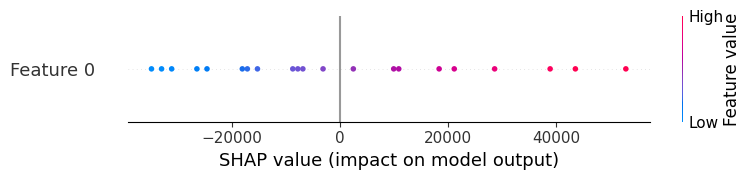

In [ ]:
explainer = shap.Explainer(clf, X_train)
shap_values = explainer(X_train)
shap.summary_plot(shap_values, X_train)

## Xgboost Regression

In [ ]:
import xgboost as xgb  # Importing xgboost library as xgb

clf = xgb.XGBRegressor()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("R-squared score (XGBoost classifier):", r2_score(y_test, y_pred))


R-squared score (XGBoost classifier): 0.8764990630727234


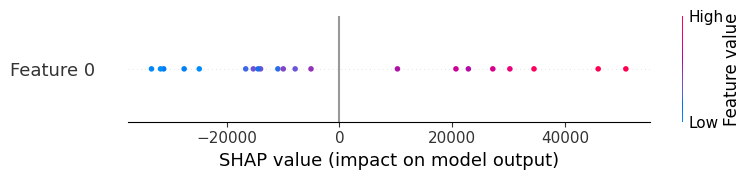

In [ ]:
explainer = shap.Explainer(clf, X_train)
shap_values = explainer(X_train)
shap.summary_plot(shap_values, X_train)

# Statsmodels Regression

In [ ]:

from statsmodels.regression import linear_model
from statsmodels.api import add_constant

# Add a constant to the independent variable matrix
X_train_with_const = add_constant(X_train)

# Fit the OLS model
model = linear_model.OLS(y_train, X_train_with_const)
results = model.fit()

# Print the summary of the regression results
print("Summary:")
print(results.summary())


Summary:
                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     427.6
Date:                Fri, 10 May 2024   Prob (F-statistic):           1.74e-14
Time:                        18:37:24   Log-Likelihood:                -210.19
No. Observations:                  21   AIC:                             424.4
Df Residuals:                      19   BIC:                             426.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.554e+04   1252.686     60.303

# Neural Net

## Neural Network Parameters

In [ ]:
activation = 'relu'
epoch = 10
num_nodes = [2,4]
dropout_prob = [0.05,0.1]
lr = [0.01,0.1]
batch_size = [2,4]

In [ ]:

myNN = aka_nn(X_train, X_test, y_train, y_test,activation)
model,scre =myNN.DNN(epoch,num_nodes,dropout_prob,lr,batch_size)


2 nodes, dropout 0.05, lr 0.01, batch size 2
1/1 [==============================] - 0s 27ms/step - loss: 8308925440.0000 - accuracy: 0.0000e+00
2 nodes, dropout 0.05, lr 0.01, batch size 4
1/1 [==============================] - 0s 27ms/step - loss: 8308719616.0000 - accuracy: 0.0000e+00
2 nodes, dropout 0.05, lr 0.1, batch size 2
1/1 [==============================] - 0s 27ms/step - loss: 8071599616.0000 - accuracy: 0.0000e+00
2 nodes, dropout 0.05, lr 0.1, batch size 4
1/1 [==============================] - 0s 27ms/step - loss: 8308366336.0000 - accuracy: 0.0000e+00
2 nodes, dropout 0.1, lr 0.01, batch size 2
1/1 [==============================] - 0s 43ms/step - loss: 8308493824.0000 - accuracy: 0.0000e+00
2 nodes, dropout 0.1, lr 0.01, batch size 4
1/1 [==============================] - 0s 38ms/step - loss: 8308460032.0000 - accuracy: 0.0000e+00
2 nodes, dropout 0.1, lr 0.1, batch size 2
1/1 [==============================] - 0s 24ms/step - loss: 7635949056.0000 - accuracy: 0.0000e+0

In [ ]:
y_pred = model.predict(X_test)
print("R-squared score (DNN):", r2_score(y_test, y_pred))

1/1 [==============================] - 0s 92ms/step
R-squared score (DNN): -9.25303358092662


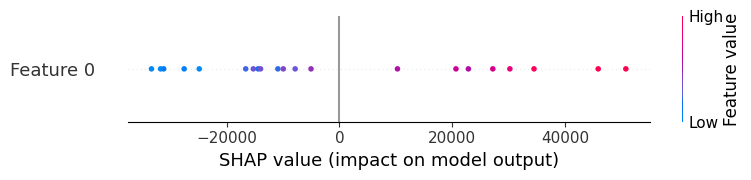

In [ ]:
explainer = shap.Explainer(clf, X_train)
shap_values = explainer(X_train)
shap.summary_plot(shap_values, X_train)